<a href="https://colab.research.google.com/github/karri-ten/Student_performance_dataset/blob/main/Student_Peformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import scipy.stats as stats
import statsmodels.graphics.correlation as sgc
from statsmodels.graphics.gofplots import qqplot
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence



In [64]:
df = pd.read_csv(r"/content/Student_Performance.csv")

In [66]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


##DATA WRANGLING

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [68]:
df[df.duplicated()]
#duplicate = df['Previous Scores'].duplicated()
#duplicate

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [70]:
df.nunique()

,0
Hours Studied,9
Previous Scores,60
Extracurricular Activities,2
Sleep Hours,6
Sample Question Papers Practiced,10
Performance Index,91


## DATA CLEANING

In [71]:
df = df.rename(columns={'Hours Studied': 'study_hours', 'Previous Scores': 'previous_scores', 'Extracurricular Activities':'extracurricular_ctivities', 'Sleep Hours':'sleep_hours', 'Sample Question Papers Practiced':'sample_question_papers_practiced','Performance Index': 'performance_index'})

In [72]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['study_hours', 'previous_scores', 'sleep_hours',
       'sample_question_papers_practiced', 'performance_index'],
      dtype='object')

In [73]:
correlation = df[num_cols].corr()
correlation

,study_hours,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
study_hours,1.000000,-0.012390,0.001245,0.017463,0.373730
previous_scores,-0.012390,1.000000,0.005944,0.007888,0.915189
sleep_hours,0.001245,0.005944,1.000000,0.003990,0.048106
sample_question_papers_practiced,0.017463,0.007888,0.003990,1.000000,0.043268
performance_index,0.373730,0.915189,0.048106,0.043268,1.000000


<Axes: >

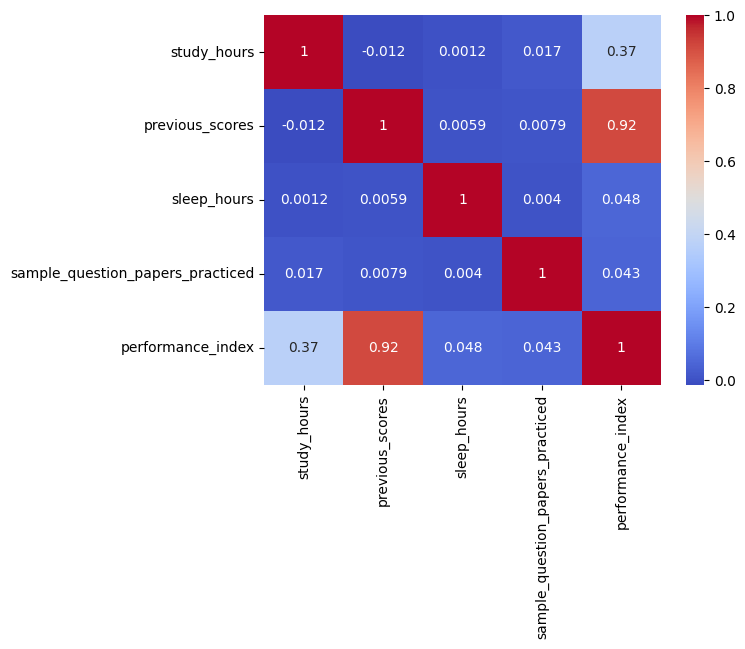

In [74]:
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [ ]:
sgc.plot_corr(df[num_cols], xnames=num_cols.columns)
plt.show

In [75]:
independent_cols =['study_hours', 'previous_scores', 'sleep_hours','sample_question_papers_practiced']
dependent_cols = 'performance_index'

In [76]:
formular = dependent_cols + "~" + "+".join(independent_cols)
formular

'performance_index~study_hours+previous_scores+sleep_hours+sample_question_papers_practiced'

In [78]:
model = smf.ols(formula=formular, data=df)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      performance_index   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.147e+05
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:00:01   Log-Likelihood:                -21418.
No. Observations:               10000   AIC:                         4.285e+04
Df Residuals:                    9995   BIC:                         4.288e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

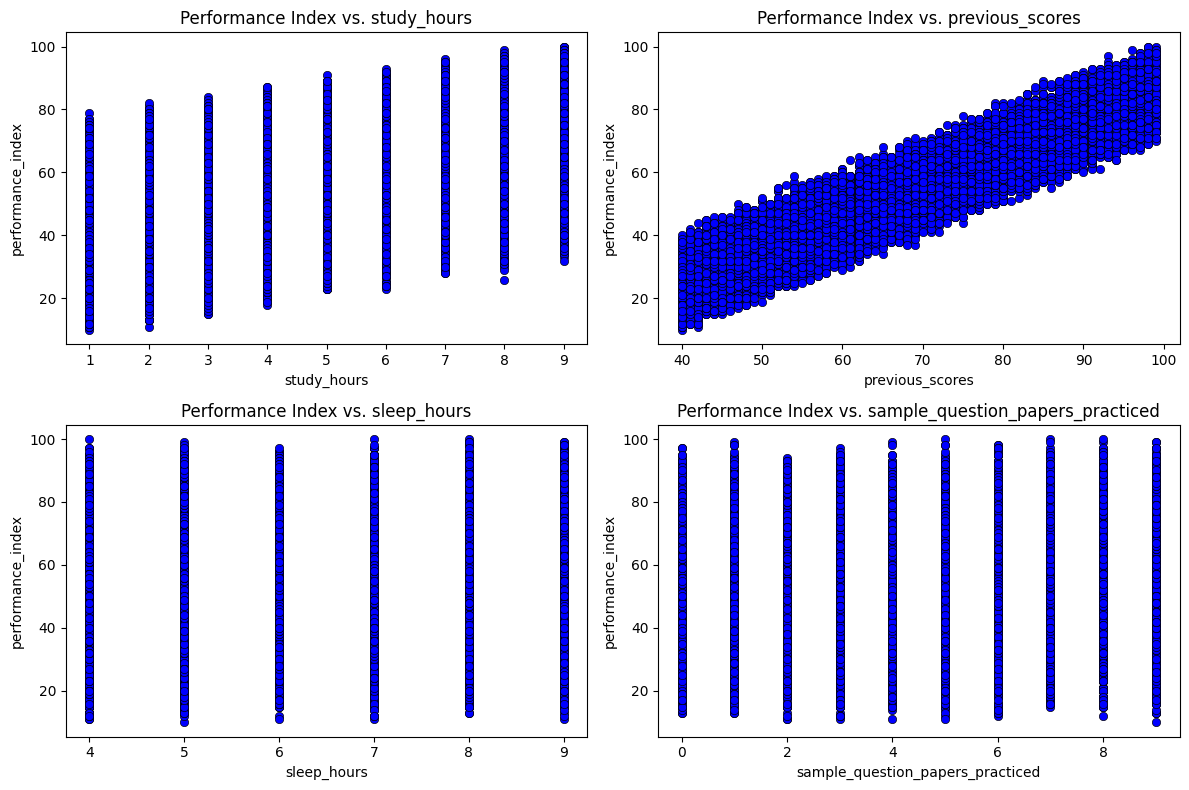

In [82]:
# Assuming 'df' is your DataFrame and independent_cols is defined
independent_cols =['study_hours', 'previous_scores', 'sleep_hours','sample_question_papers_practiced']

# Create a figure and a grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through independent variables and create scatter plots
for i, col in enumerate(independent_cols):
    sns.scatterplot(x=col, y='performance_index', data=df, ax=axes[i], color='blue',edgecolor='k')
    axes[i].set_title(f'Performance Index vs. {col}')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()